Rainfall Weather Forecasting


Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm


RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset Link-  

•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•	https://github.com/dsrscientist/dataset3











# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


This is a regression and Binary Classification Problem both type machine learning problem because the goal is to predict a continuous and discrete numeric output variable in this data set numerical data and categorical data is present

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1263,2010-03-01,CoffsHarbour,21.4,24.5,0.0,4.0,1.0,SSE,54.0,WSW,...,79.0,92.0,1014.2,1013.2,8.0,8.0,23.2,21.9,No,Yes
6461,2011-12-28,Brisbane,18.5,28.9,5.4,3.2,11.0,SSE,24.0,SSW,...,56.0,56.0,1008.1,1006.0,2.0,6.0,26.0,27.4,Yes,No
1430,2010-08-15,CoffsHarbour,8.5,23.8,0.0,2.8,10.5,WNW,52.0,N,...,46.0,23.0,1010.5,1007.5,1.0,3.0,17.6,22.1,No,No
6930,2014-12-27,Adelaide,11.5,25.9,0.0,18.6,NaN,SW,31.0,N,...,51.0,39.0,1021.2,1018.1,NaN,NaN,17.8,24.6,No,No
7357,2012-02-26,PerthAirport,9.6,26.4,0.4,6.6,12.2,SW,50.0,SSE,...,44.0,30.0,1014.8,1011.9,2.0,2.0,20.4,25.9,No,No
948,2009-04-20,CoffsHarbour,16.5,21.4,3.4,4.0,0.5,SSW,57.0,SSW,...,61.0,90.0,1013.3,1012.9,5.0,8.0,20.8,16.4,Yes,Yes
7677,2013-03-11,PerthAirport,20.1,27.4,10.2,3.4,9.5,SSW,56.0,ESE,...,78.0,49.0,1008.8,1009.2,7.0,4.0,23.5,26.8,Yes,Yes
4231,2017-04-29,Williamtown,9.0,22.6,0.0,NaN,NaN,WNW,33.0,WNW,...,73.0,55.0,1020.8,1017.8,NaN,NaN,13.9,20.1,No,Yes
6642,2012-06-26,Brisbane,13.3,16.1,0.0,2.0,0.0,WSW,17.0,S,...,76.0,90.0,1025.1,1023.5,8.0,8.0,15.8,14.1,No,Yes
3519,2009-02-21,Wollongong,19.9,22.5,2.8,NaN,NaN,S,37.0,WSW,...,92.0,81.0,1014.1,1014.7,8.0,8.0,20.3,21.3,Yes,Yes


# Cleaning the data

In [5]:
#checking the null value of  column of dataset
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

we observe that there is null value is present in  columns

In [6]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 19472


<Axes: >

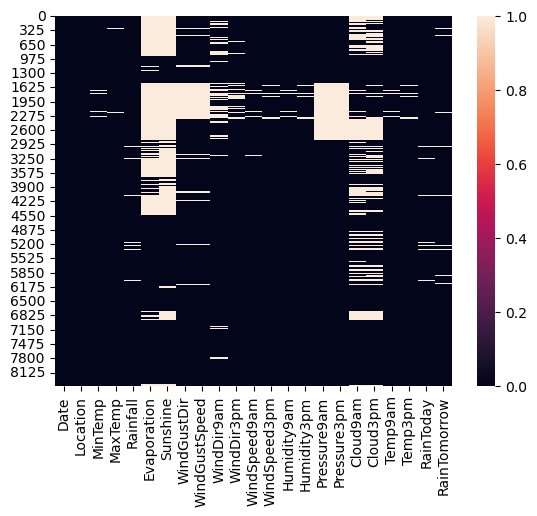

In [7]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe by heat map that there is  null value  present in many columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

 we observe that there is null value present in many column,and all datatypes seem to object and float

# Exploratory Data Analysis(EDA)

In [9]:
#checking the shape of dataset
df.shape

(8425, 23)

we observe that there 8425row and 23 columns is present in this dataset

In [10]:
#checking the column of dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

there are 23 no of column is present out of which RainTomorrow is our target 

In [11]:
# to convert index from row to column
df.columns.tolist()


['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [12]:
#checking the types of column of dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

We observe there are  object type and float datatype are present

In [13]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


mostly all column have unique value in all column there  250 unique value present in target Rainfall and 2 unique value in RainTomorrow 	

In [14]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: R

These are the value counts of all columns and we have seen there is  no white space are present

In [15]:
#checking the list of counts of target
df["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

appox two  unique value present

In [16]:
df["RainTomorrow"].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

there are 6195 no and 1991 yes to rain tomarrow

In [17]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


There are 17 Numerical column are present and 7 Categorical columns also present

# Convert Date to DateTime Object 

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# Extract Relevant Time-Based Features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0 for Monday, 6 for Sunday


# Cleaning of data

In [20]:
#Dropping irrelevant features
df = df.drop(['Date','Location'], axis=1)

In [21]:
df = df.drop(['WindGustDir','WindDir9am','WindDir3pm'], axis=1)

In [22]:
# Fill NaN values with mean,mode
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)

In [23]:
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)

In [24]:
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)

In [25]:
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)

In [26]:
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)

In [27]:
df['Cloud9am'].fillna(df['Cloud9am'].mean(), inplace=True)

In [28]:
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)

In [29]:
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)

In [30]:
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

In [31]:
df['RainToday'].fillna(df['RainToday'].mode(), inplace=True)

In [32]:
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)

In [33]:
df['RainTomorrow'].fillna(df['RainTomorrow'].mode(), inplace=True)

In [34]:
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)

In [35]:
df.dropna(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6764 entries, 0 to 8423
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        6764 non-null   float64
 1   MaxTemp        6764 non-null   float64
 2   Rainfall       6764 non-null   float64
 3   Evaporation    6764 non-null   float64
 4   Sunshine       6764 non-null   float64
 5   WindGustSpeed  6764 non-null   float64
 6   WindSpeed9am   6764 non-null   float64
 7   WindSpeed3pm   6764 non-null   float64
 8   Humidity9am    6764 non-null   float64
 9   Humidity3pm    6764 non-null   float64
 10  Pressure9am    6764 non-null   float64
 11  Pressure3pm    6764 non-null   float64
 12  Cloud9am       6764 non-null   float64
 13  Cloud3pm       6764 non-null   float64
 14  Temp9am        6764 non-null   float64
 15  Temp3pm        6764 non-null   float64
 16  RainToday      6764 non-null   object 
 17  RainTomorrow   6764 non-null   object 
 18  Year    

In [37]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

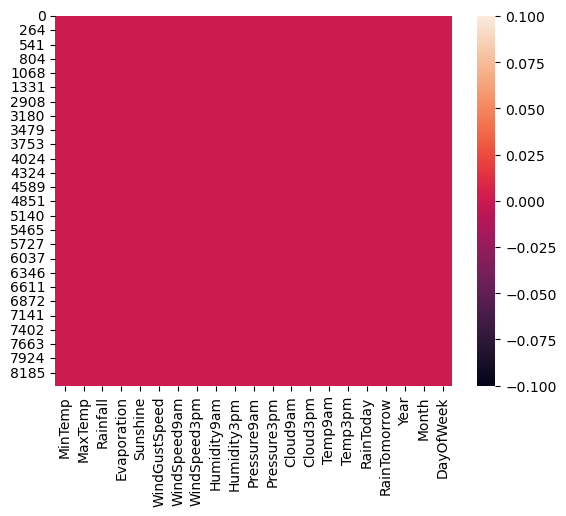

In [38]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that all nan values are filled no nan and no blank space is  present

# Description of data set

In [39]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,DayOfWeek
count,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000
mean,13.296566,23.904305,2.794648,5.361742,7.681767,40.566571,15.281047,19.614873,66.664548,51.067711,1017.748433,1015.326016,4.588245,4.504562,17.948610,22.467238,2011.673566,6.326434,2.960526
std,5.445820,6.226593,10.503021,3.399566,3.065861,14.356447,9.821614,9.135659,16.886588,18.522678,6.830315,6.751722,2.461535,2.370656,5.685923,6.043134,2.475885,3.438207,1.997946
min,-2.000000,8.200000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,0.000000
25%,9.400000,19.300000,0.000000,3.400000,7.400000,30.000000,7.000000,13.000000,55.000000,39.000000,1013.200000,1010.500000,3.000000,3.000000,13.900000,18.100000,2010.000000,3.000000,1.000000
50%,13.300000,23.300000,0.000000,5.389395,7.632205,39.000000,13.000000,19.000000,67.000000,51.000000,1017.800000,1015.400000,4.566622,4.503183,17.900000,21.900000,2011.000000,6.000000,3.000000
75%,17.425000,28.100000,0.800000,6.000000,9.600000,48.000000,20.000000,26.000000,79.000000,63.000000,1022.400000,1019.900000,7.000000,7.000000,22.100000,26.400000,2013.000000,9.000000,5.000000
max,28.500000,45.500000,371.000000,59.200000,13.900000,107.000000,61.000000,61.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,43.900000,2017.000000,12.000000,6.000000


This gives the all statical information of the numerical columns.There is no negative or invalid value is present
hence we can say that it is perfect we can observe these points: 

    1.The counts of all columns are same it means there is no missing value in any column
    
    2.The mean value and median(50%) in all columns are apoximately same in all column  then there is no skewness. 
    
    3.There is  major difference between 75% and max in capacity_mw it means there is outliers are present in these columns
    
    4.In this discription min,std and 25% detail also found

# Preprocessing

In [40]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])
df['RainTomorrow']

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 6764, dtype: int32

In [41]:
df['RainToday']=le.fit_transform(df['RainToday'])
df['RainToday']

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainToday, Length: 6764, dtype: int32

In [42]:
#checking the types of column of dataset
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Year               int64
Month              int64
DayOfWeek          int64
dtype: object

In [43]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: []


Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'DayOfWeek']


we observe that all categorical columns converted in numerical columns

# Data visualization

0    5155
1    1609
Name: RainTomorrow, dtype: int64


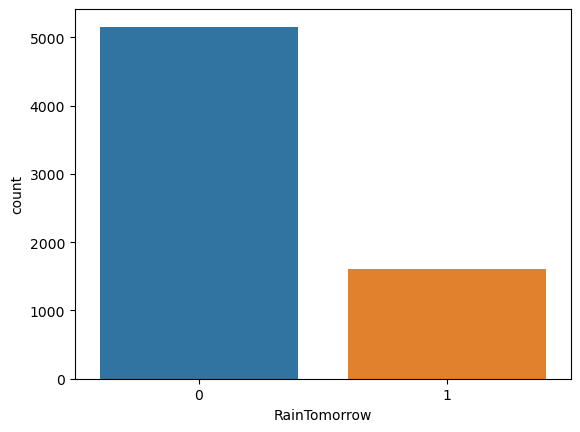

In [44]:
#visualizing the primary_fuel
ax=sns.countplot(x='RainTomorrow',data=df)
print(df['RainTomorrow'].value_counts())

We observe that chance of no ran fall is high 

0.0     4469
0.2      303
0.4      146
0.6       96
1.4       76
        ... 
29.8       1
59.0       1
38.0       1
19.8       1
20.4       1
Name: Rainfall, Length: 227, dtype: int64


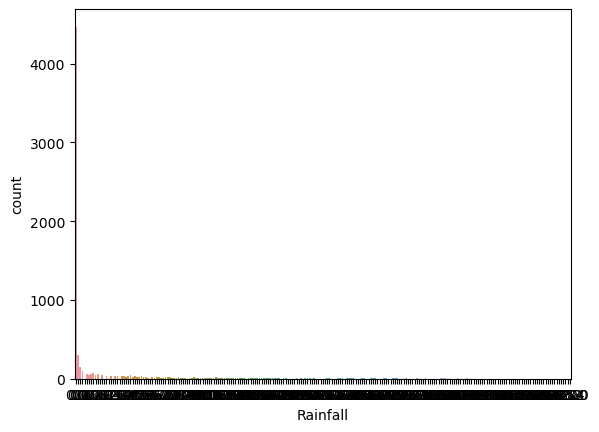

In [45]:
#visualizing the capacity_mw
ax=sns.countplot(x='Rainfall',data=df)
print(df['Rainfall'].value_counts())

[Text(0.5, 1.0, 'Effect of Evaporation on RainTomorrow')]

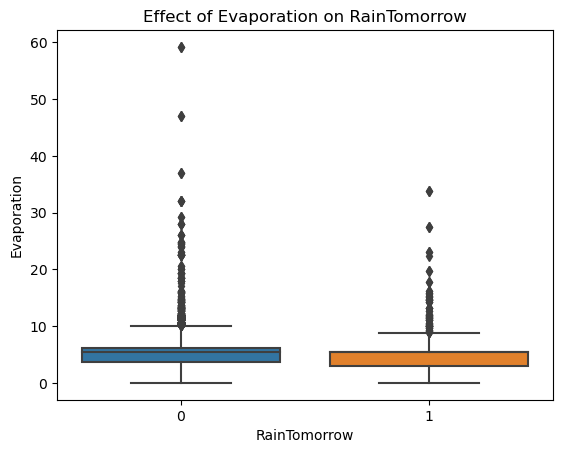

In [46]:
bp = sns.boxplot(x='RainTomorrow',y='Evaporation', data=df)
bp.set(title="Effect of Evaporation on RainTomorrow")

we observe that there is no rain when evaporation is high

[Text(0.5, 1.0, 'Effect of MaxTemp on RainTomorrow')]

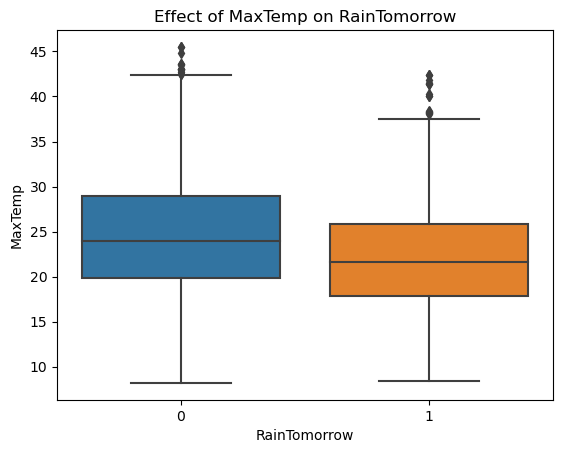

In [47]:
bp = sns.boxplot(x='RainTomorrow',y='MaxTemp', data=df)
bp.set(title="Effect of MaxTemp on RainTomorrow")

we observe that when temperature is high chance of  rain tomorrow will low

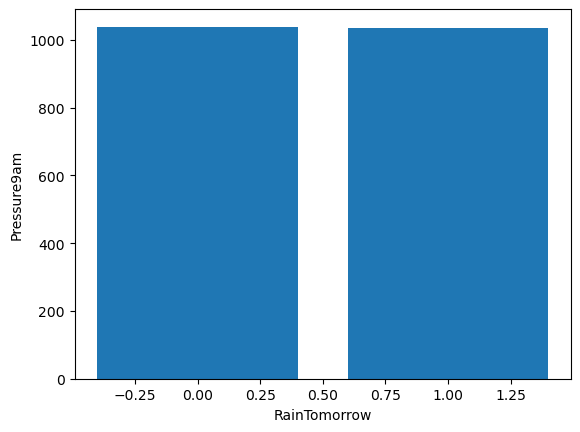

In [48]:
plt.bar(df['RainTomorrow'], df['Pressure9am'])
plt.xlabel('RainTomorrow')
plt.ylabel('Pressure9am')
plt.show()

we observe that there if pressure is high rain and no rain cxhance will same

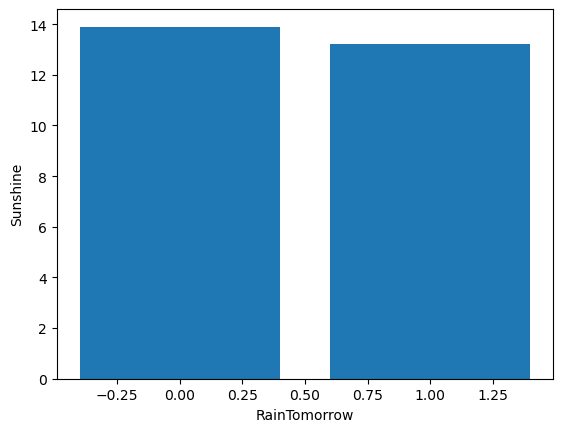

In [49]:
plt.bar(df['RainTomorrow'], df['Sunshine'])
plt.xlabel('RainTomorrow')
plt.ylabel('Sunshine')
plt.show()

We observe that when sunsine is high chance of tomorrow will low as compare to no rain

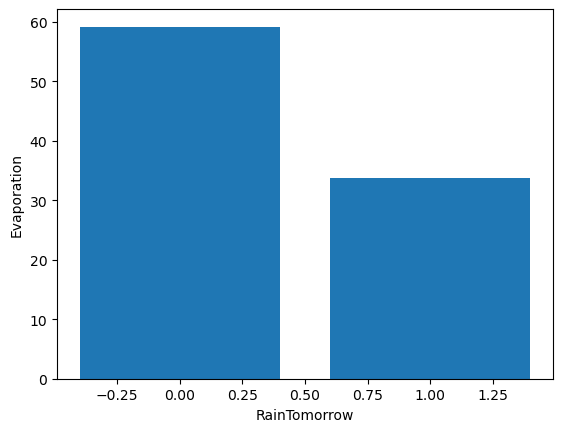

In [50]:
plt.bar(df['RainTomorrow'], df['Evaporation'])
plt.xlabel('RainTomorrow')
plt.ylabel('Evaporation')
plt.show()

we observe that when evaporation is high chance of tomorrow will low as compare to no rain

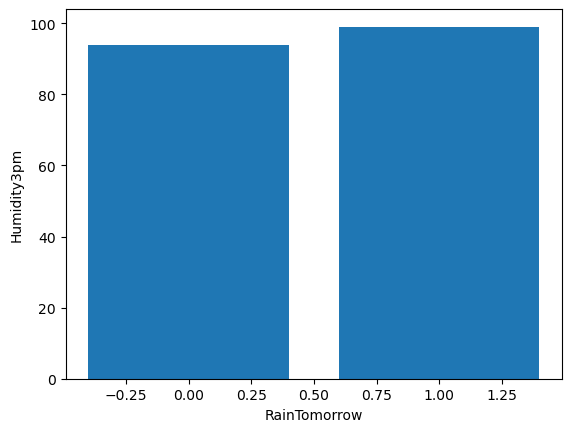

In [51]:
plt.bar(df['RainTomorrow'], df['Humidity3pm'])
plt.xlabel('RainTomorrow')
plt.ylabel('Humidity3pm')
plt.show()

we observe that when humidity at 3 pm will increase chance of rain tomorrow will increase

# checking skewness

In [52]:
#checking skewness
df.skew()

MinTemp          -0.081741
MaxTemp           0.355854
Rainfall         13.250044
Evaporation       3.979150
Sunshine         -0.662534
WindGustSpeed     0.740018
WindSpeed9am      0.932903
WindSpeed3pm      0.496540
Humidity9am      -0.223328
Humidity3pm       0.094389
Pressure9am      -0.026231
Pressure3pm      -0.008684
Cloud9am         -0.349035
Cloud3pm         -0.251592
Temp9am          -0.015933
Temp3pm           0.372804
RainToday         1.205882
RainTomorrow      1.231523
Year              0.833914
Month             0.087601
DayOfWeek         0.033648
dtype: float64

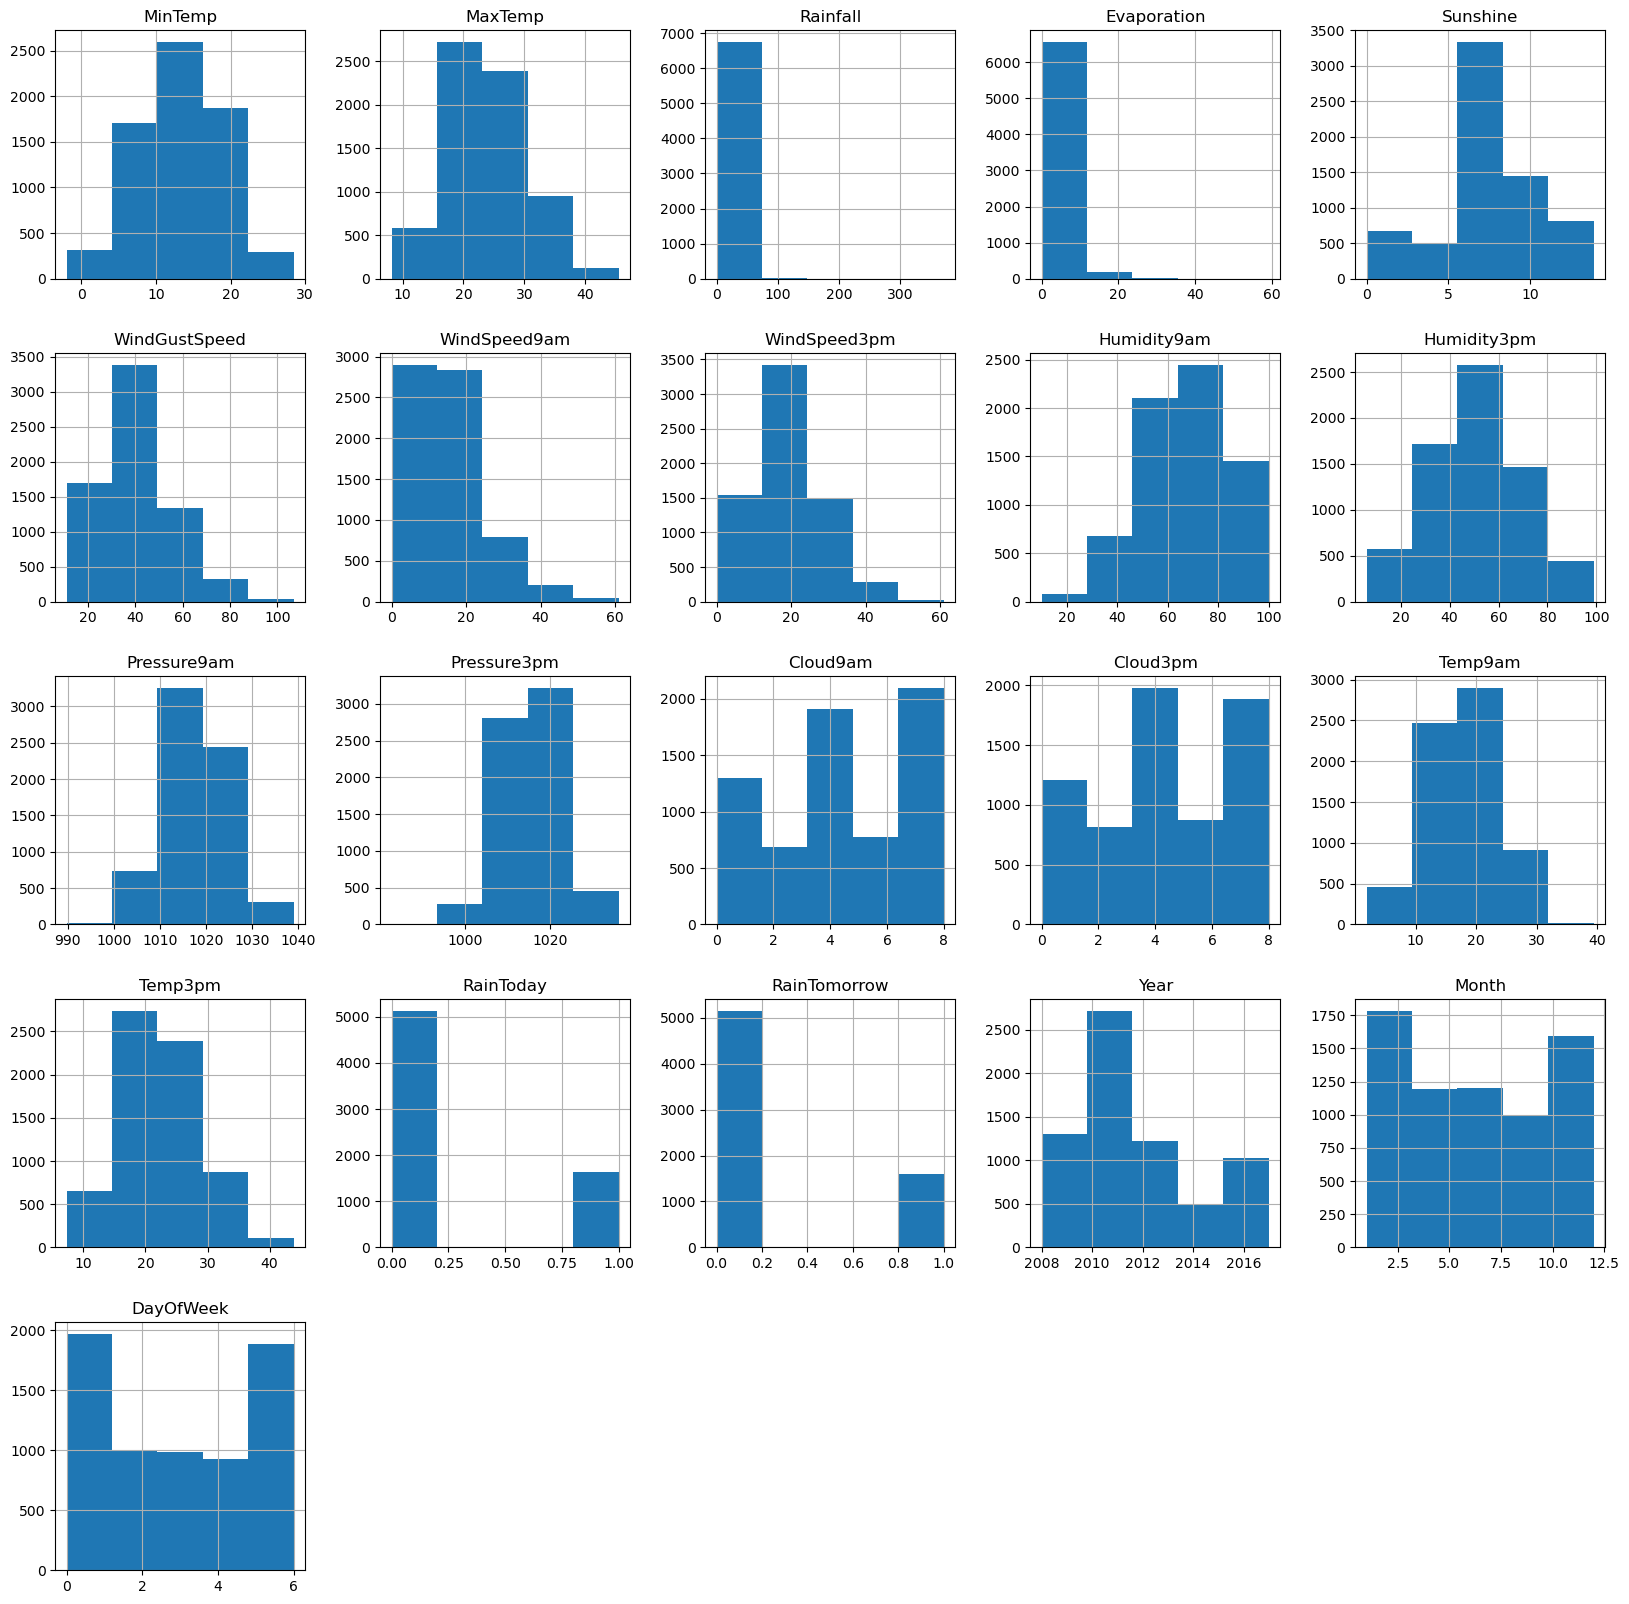

In [53]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

# Reduce skewness

In [54]:
df['RainTomorrow'] = np.cbrt(df['RainTomorrow'])

In [55]:
df['RainToday'] = np.cbrt(df['RainToday'])

In [56]:
df['Evaporation'] = np.cbrt(df['Evaporation'])

In [57]:
df['Rainfall'] = np.cbrt(df['Rainfall'])

In [58]:
#checking skewness
df.skew()

MinTemp         -0.081741
MaxTemp          0.355854
Rainfall         1.744781
Evaporation     -0.078985
Sunshine        -0.662534
WindGustSpeed    0.740018
WindSpeed9am     0.932903
WindSpeed3pm     0.496540
Humidity9am     -0.223328
Humidity3pm      0.094389
Pressure9am     -0.026231
Pressure3pm     -0.008684
Cloud9am        -0.349035
Cloud3pm        -0.251592
Temp9am         -0.015933
Temp3pm          0.372804
RainToday        1.205882
RainTomorrow     1.231523
Year             0.833914
Month            0.087601
DayOfWeek        0.033648
dtype: float64

In [59]:
df.groupby('RainTomorrow').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,DayOfWeek
RainTomorrow,,,,,,,,,,,,,,,,,,,,
0.0,13.027484,24.489063,0.356995,1.701975,8.327119,38.857667,14.797284,19.214549,63.950727,46.212803,1018.463162,1015.919580,4.171582,4.019235,18.053133,23.176838,0.161397,2011.696023,6.292338,2.987973
1.0,14.158666,22.030827,1.144969,1.631476,5.614154,46.041649,16.830951,20.897452,75.359229,66.622126,1015.458546,1013.424323,5.923175,6.059478,17.613735,20.193785,0.499689,2011.601616,6.435674,2.872592


we observe that when min temp is low 14% chance of rain tomorrow ,and if 1.14 % of rainfall chance of tomorrow rain is high

In [60]:
df.groupby('Rainfall').mean()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DayOfWeek
Rainfall,,,,,,,,,,,,,,,,,,,,
0.000000,13.130381,25.132763,1.736513,8.355213,39.854370,15.092414,19.316402,61.460282,45.724323,1018.292056,1015.476379,4.012413,4.021030,18.531707,23.697337,0.0,0.138733,2011.688297,6.285299,3.006489
0.584804,12.643564,22.094059,1.587985,6.753539,37.506832,13.854785,18.392739,73.056106,56.643564,1018.379538,1015.912211,5.233542,5.071871,16.533663,20.768977,0.0,0.244224,2012.072607,6.102310,2.825083
0.736806,13.769178,22.227397,1.628570,6.761668,39.720373,15.109589,20.335616,70.787671,59.102740,1017.886301,1016.054795,5.114374,5.151470,17.512329,20.723288,0.0,0.315068,2011.356164,6.363014,2.410959
0.843433,13.751042,22.082292,1.549451,5.812377,42.934353,15.979167,22.093750,71.979167,58.052083,1017.064583,1015.160417,5.661101,5.334262,17.321875,20.509375,0.0,0.322917,2011.343750,6.635417,3.322917
0.887904,17.900000,27.100000,2.827284,10.200000,39.000000,13.000000,24.000000,93.000000,65.000000,1018.500000,1017.500000,7.000000,3.000000,21.200000,26.300000,0.0,0.000000,2016.000000,2.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.214653,17.300000,21.000000,1.753261,0.000000,40.174469,15.000000,24.000000,78.000000,82.000000,1023.700000,1023.900000,8.000000,8.000000,20.600000,20.100000,1.0,1.000000,2009.000000,10.000000,1.000000
5.219552,24.100000,29.800000,1.753261,0.500000,78.000000,33.000000,28.000000,98.000000,84.000000,1005.900000,1002.500000,8.000000,8.000000,24.500000,28.300000,1.0,1.000000,2012.000000,3.000000,2.000000
5.522224,21.300000,26.600000,1.375069,0.700000,26.000000,2.000000,6.000000,98.000000,88.000000,1008.500000,1005.800000,8.000000,8.000000,23.300000,24.600000,1.0,1.000000,2012.000000,1.000000,2.000000


we observe that at min temp 17.4 and max temp 23.10 rainfall is high

# Correlation Matrix and Heatmap

In [61]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,DayOfWeek
MinTemp,1.000000,0.725190,0.080241,0.382796,0.057608,0.226369,0.136915,0.179690,-0.135746,0.065837,...,-0.455168,0.065132,0.024505,0.884048,0.693829,0.050615,0.088448,0.062604,-0.270667,0.011393
MaxTemp,0.725190,1.000000,-0.232865,0.477227,0.404260,0.128645,0.023122,0.076255,-0.421650,-0.433956,...,-0.423179,-0.287736,-0.271828,0.877076,0.978723,-0.241329,-0.168110,0.134052,-0.197106,0.013088
Rainfall,0.080241,-0.232865,1.000000,-0.155144,-0.297962,0.106648,0.055118,0.052146,0.431228,0.404286,...,-0.052209,0.322099,0.275094,-0.101077,-0.240582,0.883520,0.370580,-0.004546,0.007917,-0.016999
Evaporation,0.382796,0.477227,-0.155144,1.000000,0.357408,0.178464,0.147081,0.138426,-0.325521,-0.237486,...,-0.261119,-0.098820,-0.144230,0.453847,0.465898,-0.173806,-0.088703,0.157050,-0.040083,-0.018780
Sunshine,0.057608,0.404260,-0.297962,0.357408,1.000000,-0.012040,-0.013434,0.034195,-0.396062,-0.479176,...,-0.038809,-0.592328,-0.598666,0.268438,0.423783,-0.265306,-0.376801,0.069539,-0.001620,-0.009459
WindGustSpeed,0.226369,0.128645,0.106648,0.178464,-0.012040,1.000000,0.653983,0.700400,-0.271963,-0.098756,...,-0.385582,0.024292,0.087422,0.186569,0.089341,0.092559,0.213078,-0.003978,0.040810,-0.015743
WindSpeed9am,0.136915,0.023122,0.055118,0.147081,-0.013434,0.653983,1.000000,0.551888,-0.332790,-0.116527,...,-0.154733,-0.010988,0.062642,0.096022,0.006492,0.045814,0.088169,0.054486,0.047533,-0.007550
WindSpeed3pm,0.179690,0.076255,0.052146,0.138426,0.034195,0.700400,0.551888,1.000000,-0.204379,-0.055198,...,-0.240936,0.008941,0.026736,0.171254,0.051017,0.042559,0.078440,0.062251,0.044996,-0.021644
Humidity9am,-0.135746,-0.421650,0.431228,-0.325521,-0.396062,-0.271963,-0.332790,-0.204379,1.000000,0.659373,...,0.194241,0.436278,0.316149,-0.384367,-0.409792,0.396091,0.287679,0.046005,-0.115157,0.007588
Humidity3pm,0.065837,-0.433956,0.404286,-0.237486,-0.479176,-0.098756,-0.116527,-0.055198,0.659373,1.000000,...,0.070021,0.447640,0.450296,-0.145567,-0.501397,0.367264,0.469187,-0.041088,-0.059966,0.013693


In [62]:
correlations = df.corr()['RainTomorrow'].sort_values(ascending=False)
print(correlations)

RainTomorrow     1.000000
Humidity3pm      0.469187
Rainfall         0.370580
Cloud3pm         0.366466
RainToday        0.336371
Cloud9am         0.303004
Humidity9am      0.287679
WindGustSpeed    0.213078
MinTemp          0.088448
WindSpeed9am     0.088169
WindSpeed3pm     0.078440
Month            0.017752
Year            -0.016237
DayOfWeek       -0.024591
Temp9am         -0.032906
Evaporation     -0.088703
Pressure3pm     -0.157370
MaxTemp         -0.168110
Pressure9am     -0.187314
Temp3pm         -0.210194
Sunshine        -0.376801
Name: RainTomorrow, dtype: float64


<Axes: >

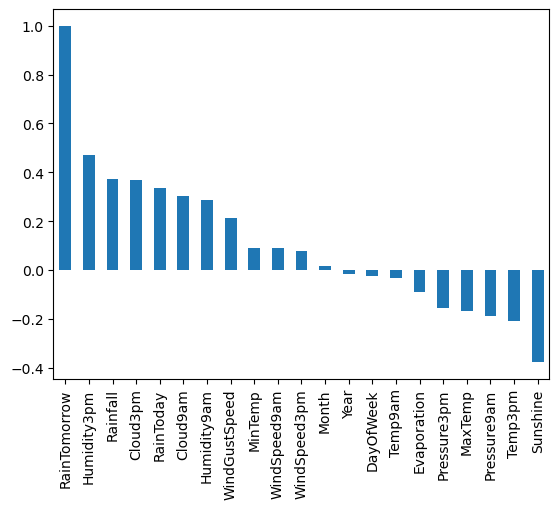

In [63]:
correlations.plot(kind='bar')

From this barplot we can observe, 
positivelly correlated feature
RainTomorrow
Humidity3pm     
Rainfall         
Cloud3pm         
RainToday       
Cloud9am        
Humidity9am     
WindGustSpeed    
MinTemp          
WindSpeed9am    
WindSpeed3pm    
Month            
       
negativelly correlated features
Year            
DayOfWeek      
Temp9am         
Evaporation     
Pressure3pm     
MaxTemp       
Pressure9am     
Temp3pm         
Sunshine 

value between +4.8 to -4.0

<Axes: >

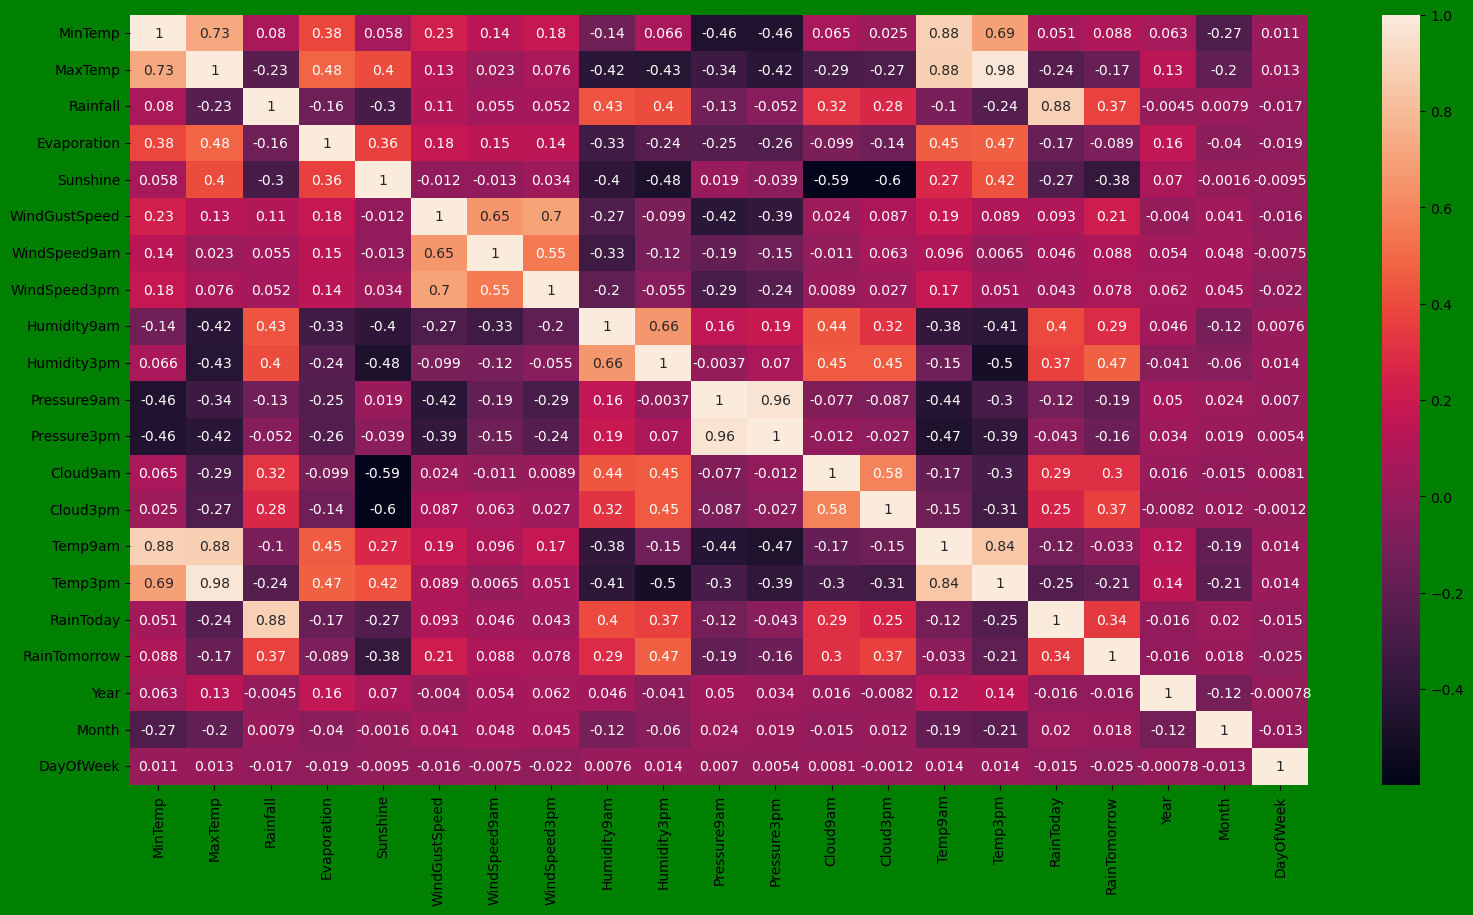

In [64]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

From this heatmap we can observe, some obvious feature correlations such as MinTemp,MaxTemp are 0.88 correlated with Temp9am and Temp3pm positivelly and rainfall with 0.88 correlated with todayrain. Sunsine and cloud9am are 0.59 negativelly correlated, since we do not have to take into account features whose values might be redundant and not provide information at all.

In [65]:
print(abs(correlations) > 0.2)

RainTomorrow      True
Humidity3pm       True
Rainfall          True
Cloud3pm          True
RainToday         True
Cloud9am          True
Humidity9am       True
WindGustSpeed     True
MinTemp          False
WindSpeed9am     False
WindSpeed3pm     False
Month            False
Year             False
DayOfWeek        False
Temp9am          False
Evaporation      False
Pressure3pm      False
MaxTemp          False
Pressure9am      False
Temp3pm           True
Sunshine          True
Name: RainTomorrow, dtype: bool


From all the values, we are selecting positive and neative correlation

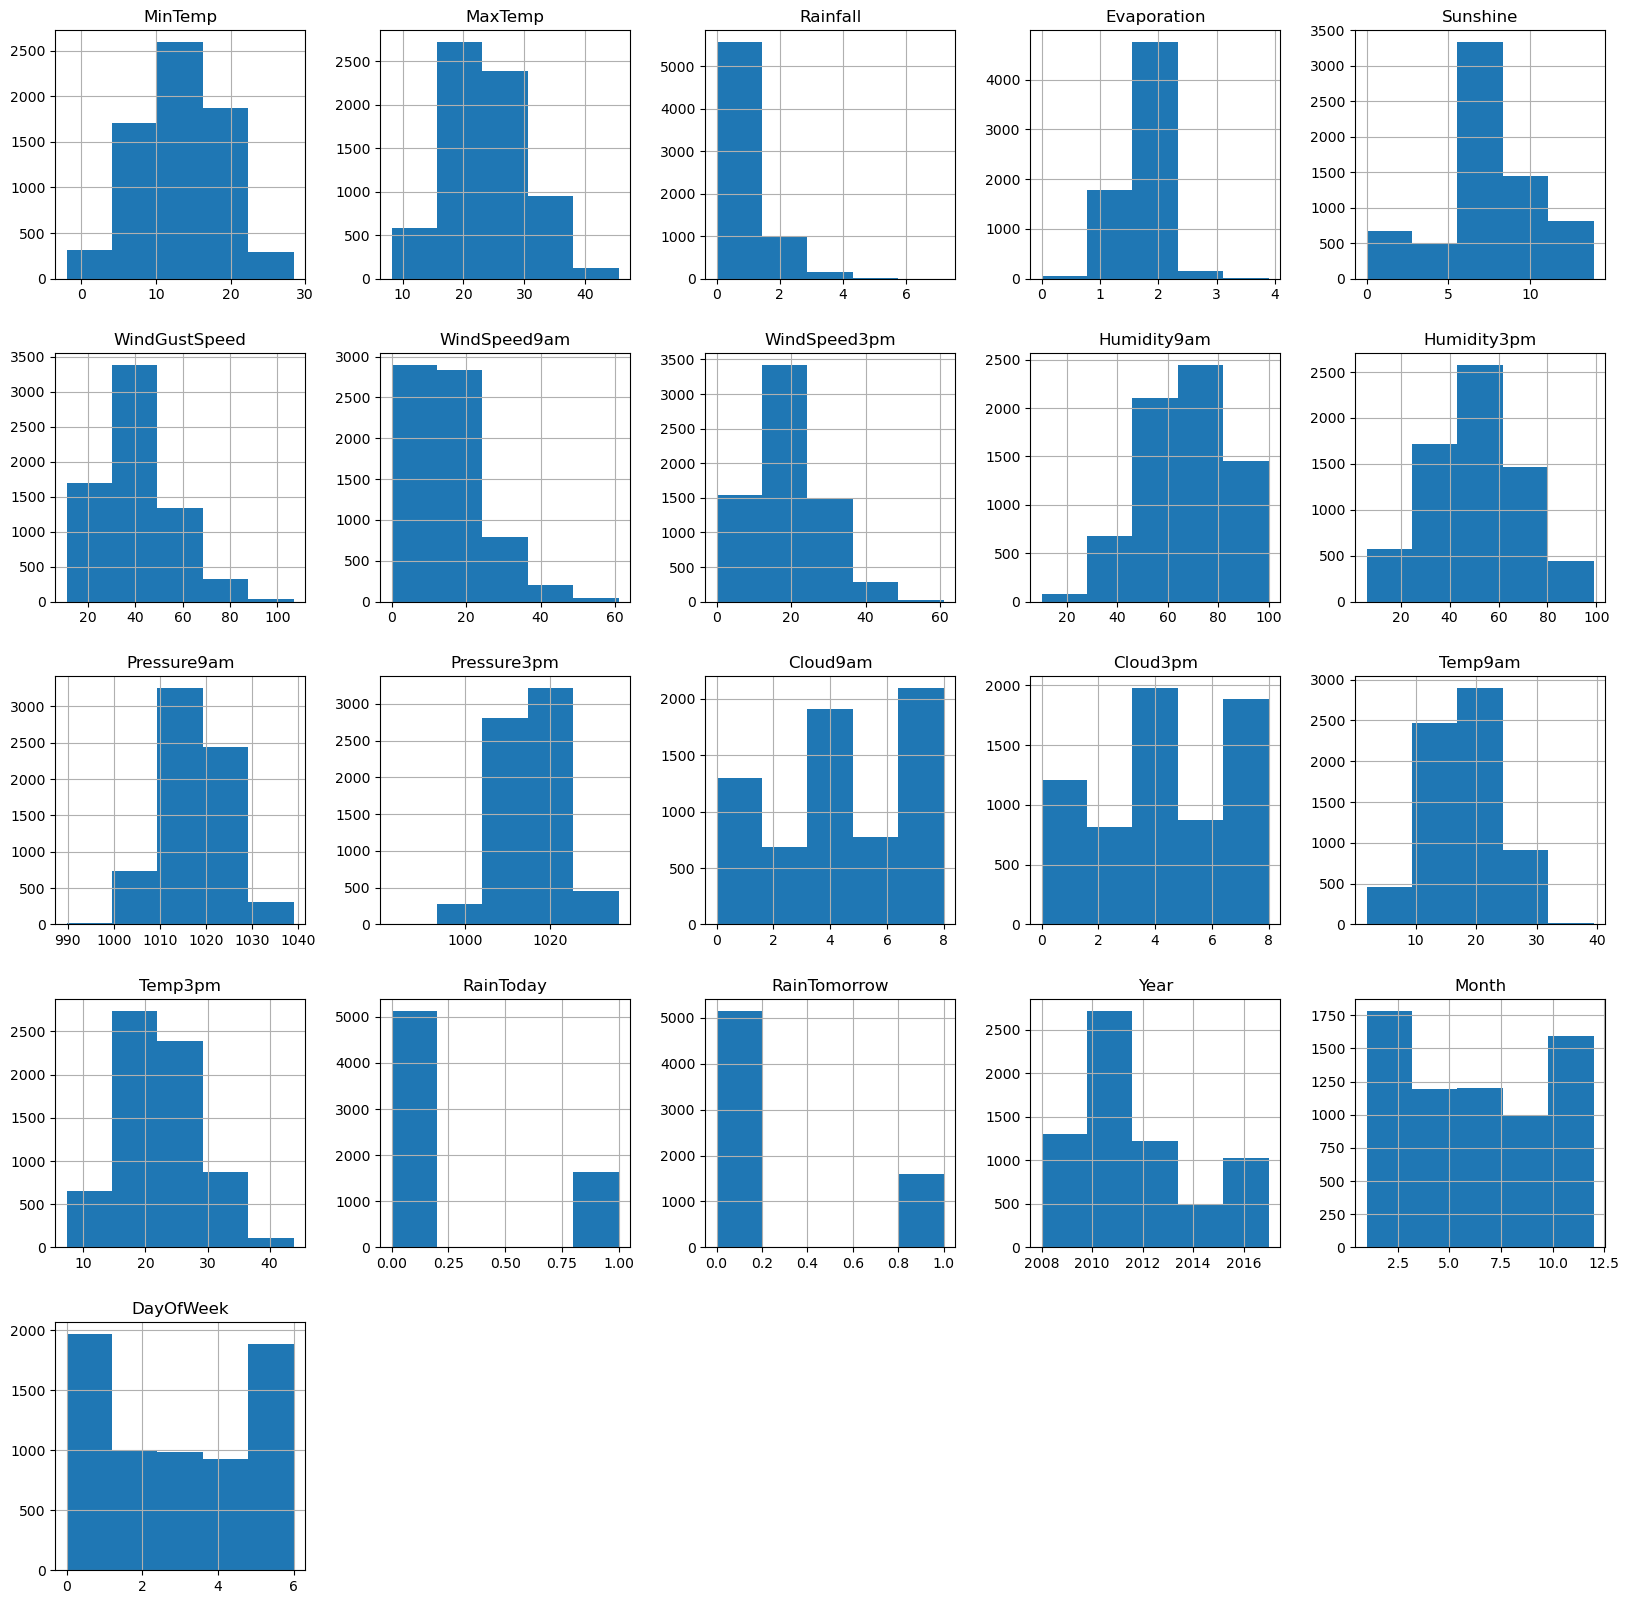

In [66]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

we observe now all features are normaly distributed

In [67]:
df = df.drop(['Temp9am'], axis=1)

In [68]:
df = df.drop(['Temp3pm'], axis=1)

In [69]:
df = df.drop(['Pressure9am'], axis=1)

In [70]:
df = df.drop(['Pressure3pm'], axis=1)

# Feature Selection

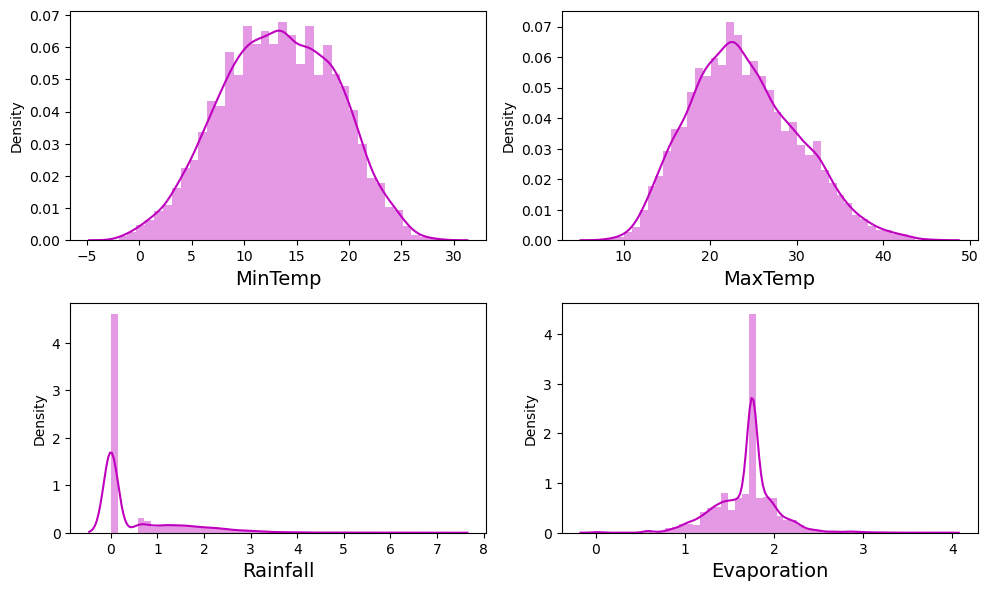

In [71]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we obseve that all featutes are normaly distributed

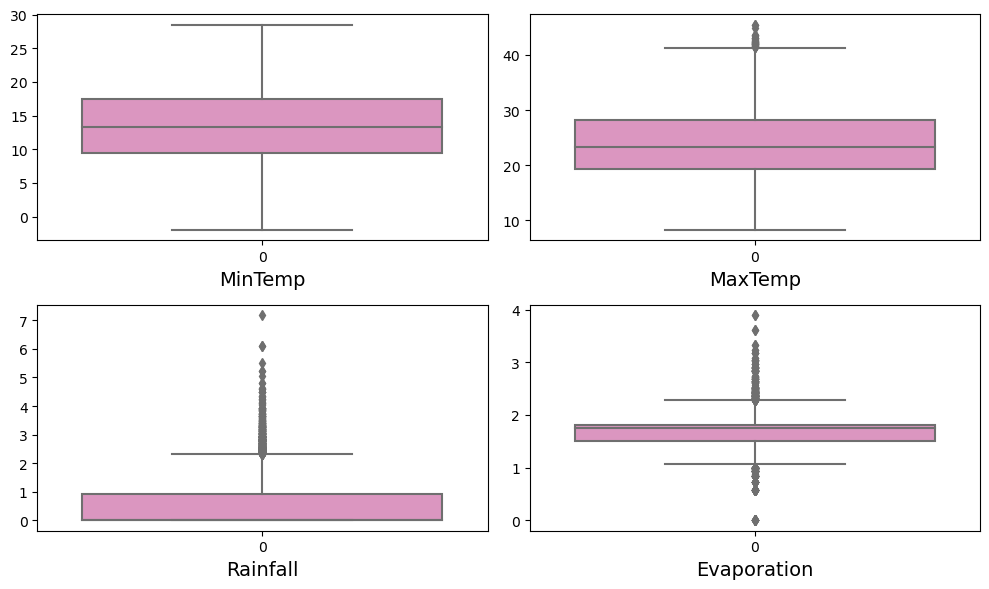

In [72]:
#checking for outliers
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we observe that in MaxTemp,RainFall and evaporation outliers are present

In [73]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,DayOfWeek
0,13.4,22.9,0.843433,1.753261,7.632205,44.0,20.0,24.0,71.0,22.0,8.000000,4.503183,0.0,0.0,2008,12,0
1,7.4,25.1,0.000000,1.753261,7.632205,44.0,4.0,22.0,44.0,25.0,4.566622,4.503183,0.0,0.0,2008,12,1
2,12.9,25.7,0.000000,1.753261,7.632205,46.0,19.0,26.0,38.0,30.0,4.566622,2.000000,0.0,0.0,2008,12,2
3,9.2,28.0,0.000000,1.753261,7.632205,24.0,11.0,9.0,45.0,16.0,4.566622,4.503183,0.0,0.0,2008,12,3
4,17.5,32.3,1.000000,1.753261,7.632205,41.0,7.0,20.0,82.0,33.0,7.000000,8.000000,0.0,0.0,2008,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,3.5,21.8,0.000000,1.753261,7.632205,31.0,15.0,13.0,59.0,27.0,4.566622,4.503183,0.0,0.0,2017,6,1
8420,2.8,23.4,0.000000,1.753261,7.632205,31.0,13.0,11.0,51.0,24.0,4.566622,4.503183,0.0,0.0,2017,6,2
8421,3.6,25.3,0.000000,1.753261,7.632205,22.0,13.0,9.0,56.0,21.0,4.566622,4.503183,0.0,0.0,2017,6,3
8422,5.4,26.9,0.000000,1.753261,7.632205,37.0,9.0,9.0,53.0,24.0,4.566622,4.503183,0.0,0.0,2017,6,4


we observe now all features are  normaly distributed 

# Split data into features and labels for classification

In [74]:
x_classification = df.drop(['RainTomorrow'], axis=1)
y_classification = df['RainTomorrow']

# Feature Scaling using Standard Scalarization

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_classification=pd.DataFrame(scaler.fit_transform(x_classification), columns = x_classification.columns)
x_classification

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,Year,Month,DayOfWeek
0,0.018995,-0.161305,0.330253,0.201109,-0.016167,0.239174,0.480502,0.480037,0.256758,-1.569420,1.386130,-0.000582,-0.56483,-1.483848,1.650274,-1.481895
1,-1.082849,0.192045,-0.601350,0.201109,-0.016167,0.239174,-1.148679,0.261098,-1.342262,-1.407444,-0.008785,-0.000582,-0.56483,-1.483848,1.650274,-0.981344
2,-0.072826,0.288413,-0.601350,0.201109,-0.016167,0.378494,0.378678,0.698975,-1.697600,-1.137485,-0.008785,-1.056563,-0.56483,-1.483848,1.650274,-0.480792
3,-0.752296,0.657823,-0.601350,0.201109,-0.016167,-1.154032,-0.435912,-1.162002,-1.283039,-1.893371,-0.008785,-0.000582,-0.56483,-1.483848,1.650274,0.019759
4,0.771921,1.348461,0.503188,0.201109,-0.016167,0.030193,-0.843208,0.042160,0.908211,-0.975509,0.979849,1.474569,-0.56483,-1.483848,1.650274,0.520310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6759,-1.799048,-0.337980,-0.601350,0.201109,-0.016167,-0.666410,-0.028617,-0.724125,-0.453917,-1.299461,-0.008785,-0.000582,-0.56483,2.151484,-0.094950,-0.981344
6760,-1.927596,-0.080998,-0.601350,0.201109,-0.016167,-0.666410,-0.232265,-0.943064,-0.927701,-1.461436,-0.008785,-0.000582,-0.56483,2.151484,-0.094950,-0.480792
6761,-1.780684,0.224167,-0.601350,0.201109,-0.016167,-1.293352,-0.232265,-1.162002,-0.631586,-1.623412,-0.008785,-0.000582,-0.56483,2.151484,-0.094950,0.019759
6762,-1.450130,0.481149,-0.601350,0.201109,-0.016167,-0.248448,-0.639560,-1.162002,-0.809255,-1.461436,-0.008785,-0.000582,-0.56483,2.151484,-0.094950,0.520310


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [76]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_classification.values, i)
                    for i in range (len(x_classification.columns))]
vif["Features"] = x_classification.columns
vif

,VIF values,Features
0,4.482502,MinTemp
1,5.462733,MaxTemp
2,4.904083,Rainfall
3,1.519508,Evaporation
4,2.216133,Sunshine
5,2.636395,WindGustSpeed
6,2.057639,WindSpeed9am
7,2.080466,WindSpeed3pm
8,2.618091,Humidity9am
9,2.992446,Humidity3pm


we observe by checking vif values the feature  causing multicollineraity problem.There is no any column have 
vif value is more than 10 so there is no multicollineraity problem

In [77]:
y_classification.value_counts()

0.0    5155
1.0    1609
Name: RainTomorrow, dtype: int64

# oversampling

In [78]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x_classification,y_classification)

In [79]:
y1.value_counts()

0.0    5155
1.0    5155
Name: RainTomorrow, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [81]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_classification_train, x_classification_test, y_classification_train, y_classification_test = train_test_split(x_classification, y_classification, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_classification_train, y_classification_train)
    pred = lr.predict(x_classification_test)
    acc = r2_score(y_classification_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.3839941149928935 on random_state  25


# Creating train test split

In [82]:
x_classification_train, x_classification_test, y_classification_train, y_classification_test = train_test_split(x_classification, y_classification, test_size = 0.30, random_state = maxRS)

# classification algorithms

In [83]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [84]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_classification_train, y_classification_train)
predRFC= RFC.predict(x_classification_test)
print(accuracy_score(y_classification_test, predRFC)) 
print(confusion_matrix(y_classification_test, predRFC)) 
print(classification_report(y_classification_test, predRFC))

0.9118226600985222
[[1505   40]
 [ 139  346]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1545
         1.0       0.90      0.71      0.79       485

    accuracy                           0.91      2030
   macro avg       0.91      0.84      0.87      2030
weighted avg       0.91      0.91      0.91      2030



we observe that Random Forest Clssifier accuracy 91.18%

# support vector classifier

In [85]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_classification_train, y_classification_train)
predsvc= svc.predict(x_classification_test)
print(accuracy_score(y_classification_test, predsvc)) 
print(confusion_matrix(y_classification_test, predsvc)) 
print(classification_report(y_classification_test, predsvc))

0.8684729064039409
[[1495   50]
 [ 217  268]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1545
         1.0       0.84      0.55      0.67       485

    accuracy                           0.87      2030
   macro avg       0.86      0.76      0.79      2030
weighted avg       0.87      0.87      0.86      2030



we observe that support vector classifier accuracy 86.84%

# ExtraTreeClassifier

In [86]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_classification_train, y_classification_train)
predET= ET.predict(x_classification_test)
print(accuracy_score(y_classification_test, predET)) 
print(confusion_matrix(y_classification_test, predET)) 
print(classification_report(y_classification_test, predET))

0.8586206896551725
[[1417  128]
 [ 159  326]]
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      1545
         1.0       0.72      0.67      0.69       485

    accuracy                           0.86      2030
   macro avg       0.81      0.79      0.80      2030
weighted avg       0.86      0.86      0.86      2030



we observe that support vector classifier accuracy 85.86%

# LogisticRegression

In [87]:
# checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_classification_train, y_classification_train)
predLR= LR.predict(x_classification_test)
print(accuracy_score(y_classification_test, predLR)) 
print(confusion_matrix(y_classification_test, predLR)) 
print(classification_report(y_classification_test, predLR))


0.8517241379310345
[[1465   80]
 [ 221  264]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1545
         1.0       0.77      0.54      0.64       485

    accuracy                           0.85      2030
   macro avg       0.82      0.75      0.77      2030
weighted avg       0.84      0.85      0.84      2030



we observe that Logistic Regression  accuracy 85.17%

# Cross Validation Score

In [88]:
from sklearn.model_selection import cross_val_score

cv=5--- it's a fold value 1,2,3,4,5

cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy

for regression- deafult scoring parameter is - r2 score

In [89]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predRFC) - score.mean())

[0.84774575 0.80413895 0.92904656 0.91943829 0.8454142 ]
0.8691567500666938
Difference between Accuracy score and cross validation score is - 0.0426659100318284


In [90]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predsvc) - score.mean())

[0.83961567 0.79305248 0.8255728  0.84996305 0.84985207]
0.8316112124273476
Difference between Accuracy score and cross validation score is - 0.036861693976593335


In [91]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predET) - score.mean())

[0.76053215 0.69253511 0.90243902 0.84848485 0.78550296]
0.7978988178800561
Difference between Accuracy score and cross validation score is - 0.06072187177511634


In [92]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predLR) - score.mean())

[0.85661493 0.7834442  0.79231338 0.85070214 0.84763314]
0.8261415570045963
Difference between Accuracy score and cross validation score is - 0.02558258092643817


Logistic Regression Classifier  is our best model as the difference between accuracy score and cross validation score
is =- 0.02558258092643817 and this is least out of all

finaly we observe that Logistic Regression Classifier is our best model

# Hyper Parameter Tuning

In [93]:
#Logistic Regression Classifier
from sklearn.model_selection import GridSearchCV

parameters={'random_state':[100,200],
            'C':[1.0,2.0],
            'intercept_scaling':[1,2],
            'fit_intercept':[True],
            'penalty':['l1','l2']}


In [94]:
GCV=GridSearchCV(LogisticRegression(),parameters, cv =5)


In [95]:
GCV.fit(x_classification_train,y_classification_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0], 'fit_intercept': [True],
                         'intercept_scaling': [1, 2], 'penalty': ['l1', 'l2'],
                         'random_state': [100, 200]})

In [96]:
GCV.best_params_

{'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'penalty': 'l2',
 'random_state': 100}

In [97]:
Final_model = LogisticRegression(C= 1.0,
 fit_intercept= True,
 intercept_scaling= 1,
 penalty= 'l2',
 random_state= 100)
Final_model.fit(x_classification_train,y_classification_train)
pred = Final_model.predict(x_classification_test)
acc = accuracy_score(y_classification_test, pred)
print(acc*100)

85.17241379310346


we observe that after hyper tuning accuracy of model will increase very less

# Saving the model

In [98]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Third_Phase_Evaluation_Projects2_Rainfall_Weather_Forecasting_RainTomorrow_Prediction_Project_Analysis.pkl")

['Third_Phase_Evaluation_Projects2_Rainfall_Weather_Forecasting_RainTomorrow_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [99]:
# first we load the saved model and get prediction
model = joblib.load("Third_Phase_Evaluation_Projects2_Rainfall_Weather_Forecasting_RainTomorrow_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_classification_test)
prediction

array([1., 1., 0., ..., 0., 1., 0.])

# these are the prediction for RainTomorrow

In [100]:
a = np.array(y_classification_test)
df1= pd.DataFrame()
df1["Predicted"] = prediction
df1["Original"] = a
df1

,Predicted,Original
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
2025,0.0,0.0
2026,0.0,0.0
2027,0.0,1.0
2028,1.0,1.0


# second prediction to predict how much rainfall

# Separating feature and target

In [101]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,DayOfWeek
0,13.4,22.9,0.843433,1.753261,7.632205,44.0,20.0,24.0,71.0,22.0,8.000000,4.503183,0.0,0.0,2008,12,0
1,7.4,25.1,0.000000,1.753261,7.632205,44.0,4.0,22.0,44.0,25.0,4.566622,4.503183,0.0,0.0,2008,12,1
2,12.9,25.7,0.000000,1.753261,7.632205,46.0,19.0,26.0,38.0,30.0,4.566622,2.000000,0.0,0.0,2008,12,2
3,9.2,28.0,0.000000,1.753261,7.632205,24.0,11.0,9.0,45.0,16.0,4.566622,4.503183,0.0,0.0,2008,12,3
4,17.5,32.3,1.000000,1.753261,7.632205,41.0,7.0,20.0,82.0,33.0,7.000000,8.000000,0.0,0.0,2008,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,3.5,21.8,0.000000,1.753261,7.632205,31.0,15.0,13.0,59.0,27.0,4.566622,4.503183,0.0,0.0,2017,6,1
8420,2.8,23.4,0.000000,1.753261,7.632205,31.0,13.0,11.0,51.0,24.0,4.566622,4.503183,0.0,0.0,2017,6,2
8421,3.6,25.3,0.000000,1.753261,7.632205,22.0,13.0,9.0,56.0,21.0,4.566622,4.503183,0.0,0.0,2017,6,3
8422,5.4,26.9,0.000000,1.753261,7.632205,37.0,9.0,9.0,53.0,24.0,4.566622,4.503183,0.0,0.0,2017,6,4


In [102]:
df=df.drop(['MaxTemp'], axis=1)

In [103]:
df=df.drop(['Humidity9am','Year','WindGustSpeed','Evaporation'], axis=1)

In [104]:
x_reg = df.drop(['Rainfall'], axis=1)
y_reg = df['Rainfall']

In [105]:
x_reg.shape

(6764, 11)

In [106]:
y_reg.shape

(6764,)

# checking variance inflation Factor(vif)

In [107]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_reg.values, i)
                    for i in range (len(x_reg.columns))]
vif["Features"] = x_reg.columns
vif

,VIF values,Features
0,7.681427,MinTemp
1,7.207844,Sunshine
2,5.060882,WindSpeed9am
3,8.171640,WindSpeed3pm
4,11.632293,Humidity3pm
5,7.622204,Cloud9am
6,7.934264,Cloud3pm
7,1.617628,RainToday
8,1.863871,RainTomorrow
9,4.322717,Month


we observe by checking vif values the feature  causing multicollineraity problem. many have  vif 
is  more than 10 so  need to drop some feature. and there is multicollineraity problem 

In [108]:
y_reg.value_counts()

0.000000    4469
0.584804     303
0.736806     146
0.843433      96
1.118689      76
            ... 
3.100312       1
3.892996       1
3.361975       1
2.705339       1
2.732394       1
Name: Rainfall, Length: 227, dtype: int64

# oversampling

In [109]:
x_reg.columns = x_reg.columns.astype(str)

In [110]:
x_reg

,MinTemp,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month,DayOfWeek
0,13.4,7.632205,20.0,24.0,22.0,8.000000,4.503183,0.0,0.0,12,0
1,7.4,7.632205,4.0,22.0,25.0,4.566622,4.503183,0.0,0.0,12,1
2,12.9,7.632205,19.0,26.0,30.0,4.566622,2.000000,0.0,0.0,12,2
3,9.2,7.632205,11.0,9.0,16.0,4.566622,4.503183,0.0,0.0,12,3
4,17.5,7.632205,7.0,20.0,33.0,7.000000,8.000000,0.0,0.0,12,4
...,...,...,...,...,...,...,...,...,...,...,...
8419,3.5,7.632205,15.0,13.0,27.0,4.566622,4.503183,0.0,0.0,6,1
8420,2.8,7.632205,13.0,11.0,24.0,4.566622,4.503183,0.0,0.0,6,2
8421,3.6,7.632205,13.0,9.0,21.0,4.566622,4.503183,0.0,0.0,6,3
8422,5.4,7.632205,9.0,9.0,24.0,4.566622,4.503183,0.0,0.0,6,4


# Model Creation

Finding the best random state

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# creating train test split

In [112]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_reg_train, y_reg_train)
    pred = lr.predict(x_reg_test)
    acc = r2_score(y_reg_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.8137883628600293 on random_state  51


In [113]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size = 0.30, random_state= maxRS)

# Regression algorithms

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge


In [115]:
LR = LinearRegression()
LR.fit(x_reg_train,y_reg_train)
pred_LR= LR.predict(x_reg_test)
pred_train=LR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_LR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_LR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_LR)))

R2_score: 0.8137883628600293
R2_score on training Data: 78.37797616944559
Mean_Absolute_Error: 0.23314454445224309
Mean_Squared_Error: 0.14037450399294732
Root Mean Squared Error: 0.37466585645471795


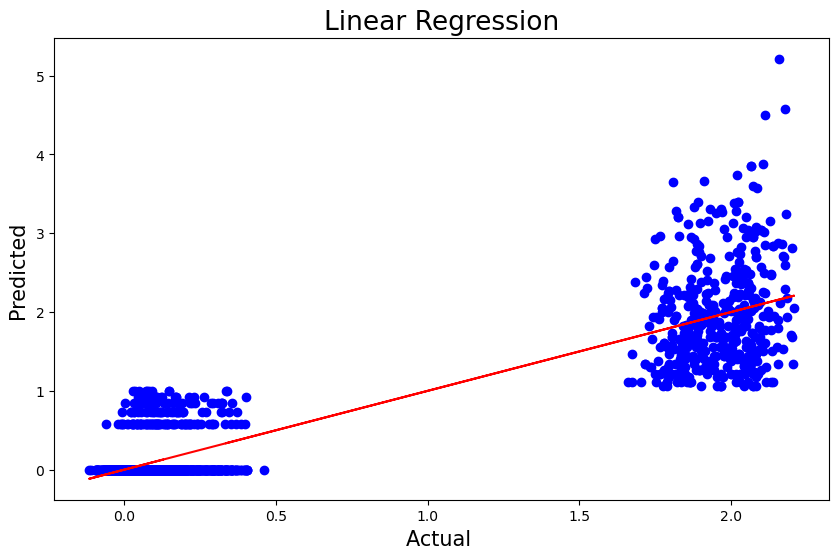

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_reg_test,color='b')
plt.plot(pred_LR,pred_LR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Linear Regression",fontsize=19)
plt.show()

In [117]:
RFR = RandomForestRegressor()
RFR.fit(x_reg_train,y_reg_train)
pred_RFR= RFR.predict(x_reg_test)
pred_train=RFR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_RFR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_RFR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_RFR)))

R2_score: 0.8613409018613998
R2_score on training Data: 97.76388283352563
Mean_Absolute_Error: 0.1908362774427127
Mean_Squared_Error: 0.10452731324565212
Root Mean Squared Error: 0.3233068407034595


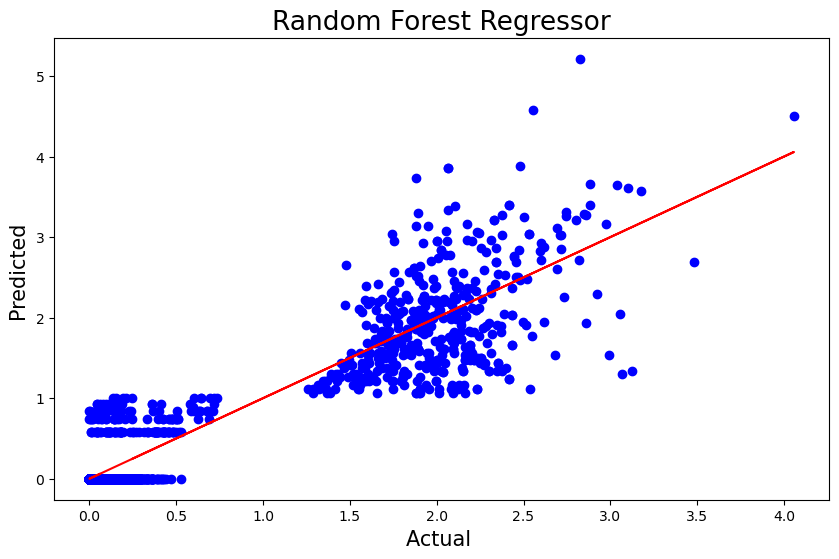

In [118]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_reg_test,color='b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Random Forest Regressor",fontsize=19)
plt.show()

In [119]:
GBR=GradientBoostingRegressor()
GBR.fit(x_reg_train,y_reg_train)
pred_GBR= GBR.predict(x_reg_test)
pred_train=GBR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_GBR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_GBR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_GBR)))

R2_score: 0.8160222500830638
R2_score on training Data: 83.79975475268431
Mean_Absolute_Error: 0.2274728693621444
Mean_Squared_Error: 0.13869050176985348
Root Mean Squared Error: 0.37241173688520274


In [120]:
rd=Ridge()
rd.fit(x_reg_train,y_reg_train)
pred_rd= rd.predict(x_reg_test)
pred_train=rd.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_rd)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_rd)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_rd)))

R2_score: 0.8137617697810384
R2_score on training Data: 78.37787129157712
Mean_Absolute_Error: 0.233324371087866
Mean_Squared_Error: 0.1403945510229307
Root Mean Squared Error: 0.3746926087113685


In [121]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_reg_train,y_reg_train)
pred_DTR= dtr.predict(x_reg_test)
pred_train=dtr.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_DTR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_DTR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_DTR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_DTR)))

R2_score: 0.7547910825071465
R2_score on training Data: 100.0
Mean_Absolute_Error: 0.1734582833872893
Mean_Squared_Error: 0.18484924302466324
Root Mean Squared Error: 0.4299409762102971


# Cross Validation Score

In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
score = cross_val_score(LR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_LR) - score.mean())*100)

[0.77556073 0.77015087 0.77959806 0.80112834 0.82893413]
0.7910744266525344
Difference between R2 score and cross validation score is : 2.2713936207494956


In [124]:
score = cross_val_score(RFR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_RFR) - score.mean())*100)

[0.76990623 0.82530953 0.90929018 0.84995173 0.80123802]
0.8311391373111228
Difference between R2 score and cross validation score is : 3.020176455027701


In [125]:
score = cross_val_score(GBR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_GBR) - score.mean())*100)

[0.78451737 0.77708509 0.80992847 0.81316874 0.81564135]
0.800068205023776
Difference between R2 score and cross validation score is : 1.595404505928788


In [126]:
score = cross_val_score(rd,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_rd) - score.mean())*100)

[0.77558074 0.7700822  0.77962789 0.80115901 0.82889924]
0.7910698159982102
Difference between R2 score and cross validation score is : 2.269195378282818


In [127]:
score = cross_val_score(dtr,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_DTR) - score.mean())*100)

[0.563686   0.68486877 0.81851368 0.65151262 0.53689677]
0.6510955684584139
Difference between R2 score and cross validation score is : 10.369551404873267


GradientBoostingRegressor() is our best model as the difference between accuracy score and cross validation score is =1.595404505928788 and this is least out of all

finaly we observe that Support Vector Regressor is our best model

# Hyper Parameter Tuning

In [128]:
# GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV



In [129]:
parameters={'loss':['squared_error','absolute_error'],'learning_rate':[1,10],'n_estimators':[100],'subsample':[1.0],'min_samples_split':[2]}

In [131]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters, cv =5)

In [132]:
GCV.fit(x_reg,y_reg)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [1, 10],
                         'loss': ['squared_error', 'absolute_error'],
                         'min_samples_split': [2], 'n_estimators': [100],
                         'subsample': [1.0]})

In [133]:
GCV.best_params_

{'learning_rate': 1,
 'loss': 'absolute_error',
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [135]:
Final_model = GradientBoostingRegressor(learning_rate =  1, loss = 'absolute_error', min_samples_split = 2, n_estimators =100, subsample = 1.0)
Final_model.fit(x_reg_train,y_reg_train)
pred = Final_model.predict(x_reg_test)
print('R2_score:',r2_score(y_reg_test,pred)) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred)))

R2_score: 0.7961230962788721
Mean_Absolute_Error: 0.18374761181655463
Mean_Squared_Error: 0.15369135718386343
Root Mean Squared Error: 0.39203489281422826


# Saving the model

In [137]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Third_Phase_Evaluation_Projects2_Rainfall_Weather_Forecasting_RainFall_Prediction_Project_Analysis.pkl")

['Third_Phase_Evaluation_Projects2_Rainfall_Weather_Forecasting_RainFall_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [138]:
# first we load the saved model and get prediction
model1= joblib.load("Third_Phase_Evaluation_Projects2_Rainfall_Weather_Forecasting_RainFall_Prediction_Project_Analysis.pkl")

#prediction
prediction1 = model1.predict(x_reg_test)
prediction1

array([0.        , 0.        , 1.56710217, ..., 0.        , 0.        ,
       0.        ])

# these are the prediction for the Rainfall

In [139]:
a1=np.array(y_reg_test)
df2 = pd.DataFrame()
df2["Predicted1"]  = prediction1
df2["Original1"] = a1
df2

,Predicted1,Original1
0,0.000000,0.000000
1,0.000000,0.000000
2,1.567102,2.444092
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
2025,2.619369,1.118689
2026,3.504819,2.852086
2027,0.000000,0.000000
2028,0.000000,0.000000


our findings
for classification problem

Logistic Regression Classifier is our best model as the difference between accuracy score and cross validation score is =- 0.02558258092643817 and this is least out of all

finaly we observe that Logistic Regression Classifier is our best model

for regression model

GradientBoostingRegressor() is our best model as the difference between accuracy score and cross validation score is =1.595404505928788 and this is least out of all

finaly we observe that Support Vector Regressor is our best model

other finging after EDA and visualization
1.This is a regression and Binary Classification Problem both type machine learning problem because the goal is to predict a continuous and discrete numeric output variable in this data set numerical data and categorical data is present.
2.Number of null or missing values in dataset 19472.
3.Approx two unique value present in RainTomorrow.
4.we observe that there 8425 row and 23 columns is present in this dataset.
5.We observe there are  object type and float datatype are present.
6.There are 17 Numerical column are present and 7 Categorical columns also present.
7.We observe that chance of no ran fall is high.
8.From this heatmap we can observe, some obvious feature correlations such as MinTemp,MaxTemp are 0.88 correlated with Temp9am and Temp3pm positivelly and rainfall with 0.88 correlated with todayrain. Sunsine and cloud9am are 0.59 negativelly correlated, since we do not have to take into account features whose values might be redundant and not provide information at all.
9.we observe that there if pressure is high rain and no rain cxhance will same.
10.We observe that Logistic Regression accuracy 85.17% for RainTomorrow
11.R2_score: 0.8160222500830638 for Rainfall